In [1]:
import pandas as pd

# Load the data
file_path = 'G:/Hangkai/Forest_edge_mapping_data/processed_country_data_with_area.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataframe
data.info()
data.head()

C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     189 non-null    object 
 1   stable                      189 non-null    float64
 2   stable_per2000              189 non-null    float64
 3   stable_per2020              189 non-null    float64
 4   increase increase           189 non-null    float64
 5   increase increase percent   189 non-null    float64
 6   increase decrease           189 non-null    float64
 7   increase decrease percent   189 non-null    float64
 8   decrease increase           189 non-null    float64
 9   decrease increase percent   189 non-null    float64
 10  decrease decrease           189 non-null    float64
 11  decrease decrease percent   189 non-null    float64
 12  total increase per          189 non-null    float64
 13  total increase              189 non

C:\Users\hyou34\AppData\Local\Temp\ipykernel_105616\3866038848.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,country,stable,stable_per2000,stable_per2020,increase increase,increase increase percent,increase decrease,increase decrease percent,decrease increase,decrease increase percent,...,forest edge 2020,Unchanged Forest Area,Increased Forest Area 2020,Decreased Forest Area 2000,Total Forest Area 2000,Total Forest Area 2020,decrease rate,increase rate,Area Change,Edge Change
0,Indonesia,2.932940e+06,0.547937,0.585812,377782.3233,0.075456,1.695902e+06,0.338732,1.458103e+06,0.272406,...,5.006624e+06,1.474394e+06,48603.287350,89282.524090,1.563676e+06,1.522997e+06,0.057098,0.031913,-0.026015,-0.064653
1,Malaysia,2.921738e+05,0.423681,0.383578,63868.5001,0.083849,4.056648e+05,0.532573,2.826837e+05,0.409920,...,7.617070e+05,2.752761e+05,10048.507260,21272.398800,2.965485e+05,2.853246e+05,0.071733,0.035218,-0.037848,0.104551
2,Chile,1.523514e+06,0.791067,0.838995,138571.9005,0.076311,1.537945e+05,0.084694,2.339075e+05,0.121454,...,1.815880e+06,1.623306e+05,7197.778945,7392.213558,1.697228e+05,1.695284e+05,0.043555,0.042458,-0.001146,-0.057125
3,Bolivia,1.548777e+06,0.719363,0.738685,158406.1880,0.075551,3.894838e+05,0.185763,2.318779e+05,0.107701,...,2.096667e+06,5.571181e+05,6196.640349,39615.066220,5.967332e+05,5.633148e+05,0.066387,0.011000,-0.056002,-0.026158
4,Peru,9.658076e+05,0.769824,0.708248,107564.7010,0.078880,2.902844e+05,0.212872,1.654066e+05,0.131842,...,1.363657e+06,7.762328e+05,4311.612493,11962.057580,7.881949e+05,7.805444e+05,0.015177,0.005524,-0.009706,0.086941


In [2]:
import numpy as np
import statsmodels.api as sm

# Removing rows with zero or negative values in the columns used for regression
data = data[(data['Total Forest Area 2020'] > 0) & (data['forest edge 2020'] > 0)]

# Defining the dependent variable (Y) and independent variable (x)
Y = np.log(data['Total Forest Area 2020'])
X = np.log(data['forest edge 2020'])

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Creating the ordinary least squares (OLS) model
model = sm.OLS(Y, X).fit()

# Displaying the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Forest Area 2020   R-squared:                       0.935
Model:                                OLS   Adj. R-squared:                  0.934
Method:                     Least Squares   F-statistic:                     2682.
Date:                    Thu, 30 May 2024   Prob (F-statistic):          7.84e-113
Time:                            16:55:04   Log-Likelihood:                -247.42
No. Observations:                     189   AIC:                             498.8
Df Residuals:                         187   BIC:                             505.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9446      0.265    -14.895      0.000      -4.467      -3.422
forest edge 2020     1.1214      0.022     51.791      0.000       1.079       1.164
==============================================================================
Omnibus:                       34.812   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.893
Skew:                           1.061   Prob(JB):                     1.47e-11
Kurtosis:                       4.354   Cond. No.                         49.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
import numpy as np
import statsmodels.api as sm

# Removing rows with zero or negative values in the columns used for regression
data = data[(data['Total Forest Area 2020'] > 0) & (data['forest edge 2020'] > 0)]

# Defining the dependent variable (Y) and independent variable (x)
Y = np.log(data['Total Forest Area 2020'])
X = np.log(data['forest edge 2020'])

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Creating the ordinary least squares (OLS) model
model = sm.OLS(Y, X).fit()

# Displaying the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Forest Area 2020   R-squared:                       0.935
Model:                                OLS   Adj. R-squared:                  0.934
Method:                     Least Squares   F-statistic:                     2682.
Date:                    Thu, 30 May 2024   Prob (F-statistic):          7.84e-113
Time:                            16:55:08   Log-Likelihood:                -247.42
No. Observations:                     189   AIC:                             498.8
Df Residuals:                         187   BIC:                             505.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9446      0.265    -14.895      0.000      -4.467      -3.422
forest edge 2020     1.1214      0.022     51.791      0.000       1.079       1.164
==============================================================================
Omnibus:                       34.812   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.893
Skew:                           1.061   Prob(JB):                     1.47e-11
Kurtosis:                       4.354   Cond. No.                         49.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Getting the predicted values
data['predicted_log_area'] = model.predict(X)

# Exponentiating the predicted values to get them on the original scale
data['predicted_area'] = np.exp(data['predicted_log_area'])

# Calculating the residuals (deviations from the regression line)
data['residuals'] = data['Total Forest Area 2020'] - data['predicted_area']

# Displaying the residuals
data[['country', 'Total Forest Area 2020', 'predicted_area', 'residuals']].head()

,country,Total Forest Area 2020,predicted_area,residuals
0,Indonesia,1.522997e+06,630225.016405,892771.916595
1,Malaysia,2.853246e+05,76294.574594,209030.049406
2,Chile,1.695284e+05,202107.676666,-32579.287366
3,Bolivia,5.633148e+05,237467.040768,325847.724632
4,Peru,7.805444e+05,146590.338302,633954.086698


In [5]:
# Getting the predicted values
data['predicted_log_area'] = model.predict(X)

# Exponentiating the predicted values to get them on the original scale
data['predicted_area'] = np.exp(data['predicted_log_area'])

# Calculating the residuals (deviations from the regression line)
data['residuals'] = np.log(data['Total Forest Area 2020']) - data['predicted_log_area']

# Displaying the residuals
data[['country', 'Total Forest Area 2020', 'predicted_area', 'residuals']].head()

,country,Total Forest Area 2020,predicted_area,residuals
0,Indonesia,1.522997e+06,630225.016405,0.882358
1,Malaysia,2.853246e+05,76294.574594,1.319026
2,Chile,1.695284e+05,202107.676666,-0.175780
3,Bolivia,5.633148e+05,237467.040768,0.863810
4,Peru,7.805444e+05,146590.338302,1.672350


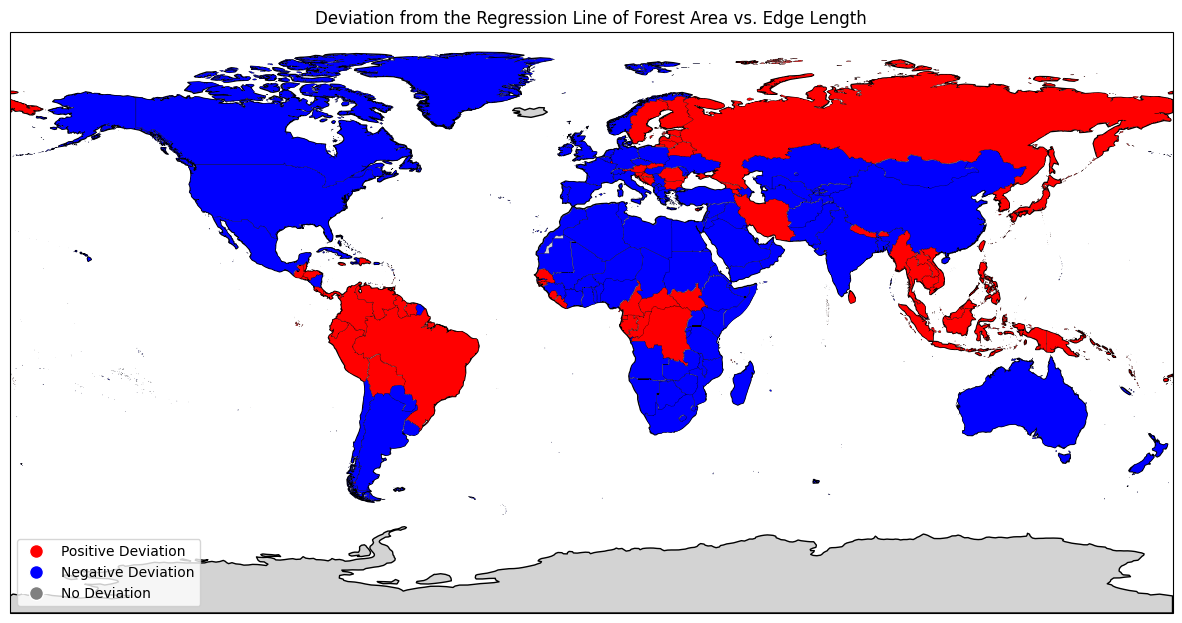

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy

# Function to get the deviation color
def get_color(deviation):
    if deviation > 0:
        return 'red'
    elif deviation < 0:
        return 'blue'
    else:
        return 'grey'

# Creating a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

# Reading the shapefile for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Plotting each country with the color representing the deviation
for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['SOVEREIGNT']
    if country_name in data['country'].values:
        deviation = data[data['country'] == country_name]['residuals'].values[0]
        color = get_color(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)

# Adding a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Positive Deviation'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Negative Deviation'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=10, label='No Deviation')]

ax.legend(handles=legend_elements, loc='lower left')

plt.title('Deviation from the Regression Line of Forest Area vs. Edge Length')
plt.show()

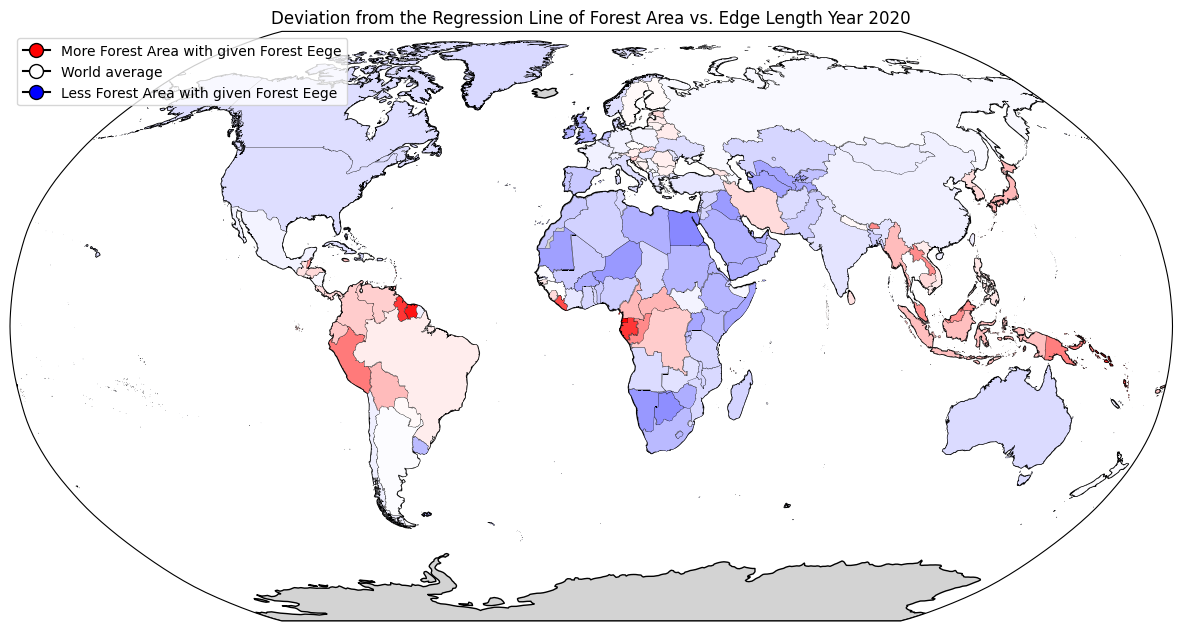

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
import numpy as np

# Function to get the deviation color
def get_color(deviation):
    max_deviation = max(abs(data['residuals']))
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'

# Creating a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

# Reading the shapefile for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Plotting each country with the color representing the deviation
for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['SOVEREIGNT']
    if country_name in data['country'].values:
        deviation = data[data['country'] == country_name]['residuals'].values[0]
        color = get_color(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)
    if country_name == 'Taiwan':
        deviation = data[data['country'] == "China"]['residuals'].values[0]
        color = get_color(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)

# Adding a title
plt.title('Deviation from the Regression Line of Forest Area vs. Edge Length Year 2020')

legend_elements = [Line2D([0], [0], marker='o', color='black', markerfacecolor='red', markersize=10, label='More Forest Area with given Forest Eege'),
                   Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=10, label='World average'),
                   Line2D([0], [0], marker='o', color='black', markerfacecolor='blue', markersize=10, label='Less Forest Area with given Forest Eege')
                  ]

ax.legend(handles=legend_elements, loc='upper left')

plt.show()

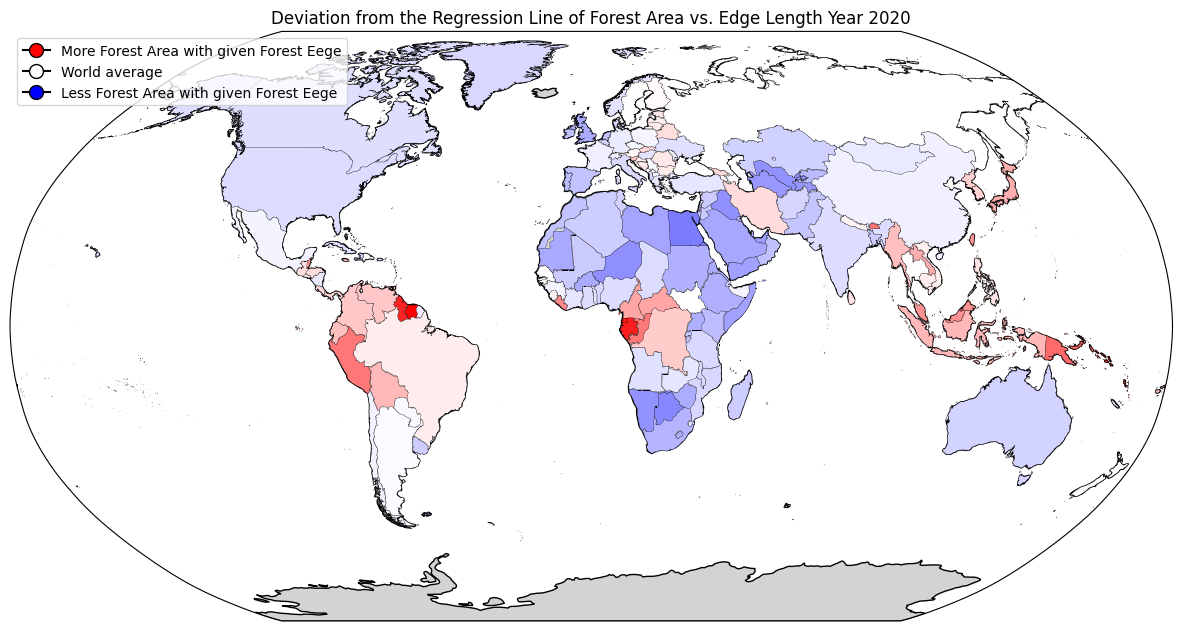

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
import numpy as np

# Function to get the deviation color
def get_color(deviation):
    max_deviation = max(abs(data['residuals']))
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'

# Creating a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

# Reading the shapefile for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Plotting each country with the color representing the deviation
for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['SOVEREIGNT']
    if country_name in data['country'].values:
        deviation = data[data['country'] == country_name]['residuals'].values[0]
        color = get_color(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)

# Adding a title
plt.title('Deviation from the Regression Line of Forest Area vs. Edge Length Year 2020')

legend_elements = [Line2D([0], [0], marker='o', color='black', markerfacecolor='red', markersize=10, label='More Forest Area with given Forest Eege'),
                   Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=10, label='World average'),
                   Line2D([0], [0], marker='o', color='black', markerfacecolor='blue', markersize=10, label='Less Forest Area with given Forest Eege')
                  ]
ax.legend(handles=legend_elements, loc='upper left')

plt.show()

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data
file_path = 'G:/Hangkai/Forest_edge_mapping_data/processed_country_data_with_area.csv'
data = pd.read_csv(file_path)

# Removing rows with zero or negative values in the columns used for regression
data = data[(data['Total Forest Area 2020'] > 0) & (data['forest edge 2020'] > 0)]

# Defining the dependent variable (Y) and independent variable (x)
Y = np.log(data['Total Forest Area 2020'])
X = np.log(data['forest edge 2020'])

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Creating the ordinary least squares (OLS) model and getting the predictions
model = sm.OLS(Y, X).fit()
data['predicted_log_area'] = model.predict(X)
data['predicted_area'] = np.exp(data['predicted_log_area'])

# Calculating the residuals
data['residuals'] = model.resid

# Calculating the hat matrix
hat_matrix = X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))

# Getting the diagonal of the hat matrix to obtain the leverage values
hat_matrix_diag = np.diag(hat_matrix)

# Estimating the standard deviation of the residuals (excluding the i-th observation)
sigma_i = np.sqrt((model.ssr - data['residuals']**2) / (len(X) - 2))

# Calculating the Studentized residuals manually
data['studentized_residuals_manual'] = data['residuals'] / (sigma_i * np.sqrt(1 - hat_matrix_diag))

# Displaying the Studentized residuals
data[['country', 'residuals', 'studentized_residuals_manual']].head()

,country,residuals,studentized_residuals_manual
0,Indonesia,0.882358,0.988356
1,Malaysia,1.319026,1.477924
2,Chile,-0.175780,-0.196054
3,Bolivia,0.863810,0.965931
4,Peru,1.672350,1.881714


In [16]:
# Ranking the residuals and studentized residuals
data['residual_rank'] = data['residuals'].rank()
data['studentized_residual_rank'] = data['studentized_residuals_manual'].rank()

# Displaying the rankings along with the residuals and studentized residuals
comparison = data[['country', 'residuals', 'residual_rank', 'studentized_residuals_manual', 'studentized_residual_rank']]

# Show the comparison head
print(comparison.head())

# Check if the rankings are the same
# A perfect correlation of 1.0 means the rankings are identical
correlation = comparison['residual_rank'].corr(comparison['studentized_residual_rank'])
print(f"The correlation between the two rankings is: {correlation}")

# You might also want to see how many are exactly the same and how many differ
matches = comparison['residual_rank'] == comparison['studentized_residual_rank']
exact_matches = matches.sum()
total_observations = len(comparison)
print(f"Number of exact matches in ranking: {exact_matches} out of {total_observations}")

     country  residuals  residual_rank  studentized_residuals_manual  \
0  Indonesia   0.882358          163.0                      0.988356   
1   Malaysia   1.319026          175.0                      1.477924   
2      Chile  -0.175780           93.0                     -0.196054   
3    Bolivia   0.863810          162.0                      0.965931   
4       Peru   1.672350          179.0                      1.881714   

   studentized_residual_rank  
0                      163.0  
1                      175.0  
2                       93.0  
3                      162.0  
4                      179.0  
The correlation between the two rankings is: 0.999980447572833
Number of exact matches in ranking: 170 out of 189


In [17]:
matches = comparison['residual_rank'] != comparison['studentized_residual_rank']
data['country'][matches]

8             India
9             China
15            Kenya
32          Belarus
39       Tajikistan
59          Albania
82         Djibouti
87      Switzerland
99            Qatar
106      San Marino
118        eSwatini
127          Uganda
139         Lesotho
143    Burkina Faso
162       Australia
171      Seychelles
182           Malta
185        Maldives
188         Bahrain
Name: country, dtype: object

In [18]:
# Sorting by residuals to find top 5 and bottom 5
top5_residuals = data.nlargest(10, 'residuals')[['country', 'residuals', 'studentized_residuals_manual']]
bottom5_residuals = data.nsmallest(10, 'residuals')[['country', 'residuals', 'studentized_residuals_manual']]

# Sorting by studentized residuals to find top 5 and bottom 5
top5_studentized = data.nlargest(5, 'studentized_residuals_manual')[['country', 'residuals', 'studentized_residuals_manual']]
bottom5_studentized = data.nsmallest(5, 'studentized_residuals_manual')[['country', 'residuals', 'studentized_residuals_manual']]

# Printing the top and bottom 5 for residuals
print("Top 5 residuals:")
print(top5_residuals)
print("\nBottom 5 residuals:")
print(bottom5_residuals)

# Printing the top and bottom 5 for studentized residuals
print("\nTop 5 studentized residuals:")
print(top5_studentized)
print("\n")
print("\nBottom 5 studentized residuals:")
print(bottom5_studentized)
print("\n")

Top 5 residuals:
               country  residuals  studentized_residuals_manual
21            Suriname   3.124799                      3.596182
157  Equatorial Guinea   2.900906                      3.325791
141              Gabon   2.776498                      3.172194
22              Guyana   2.713658                      3.096649
184    Solomon Islands   2.563148                      2.919078
186            Vanuatu   2.341522                      2.658356
177           Dominica   2.290707                      2.610961
114             Brunei   2.076890                      2.349869
153   Papua New Guinea   1.825195                      2.055768
30              Bhutan   1.706930                      1.918733

Bottom 5 residuals:
                  country  residuals  studentized_residuals_manual
154                 Egypt  -1.619315                     -1.820651
101              Botswana  -1.467570                     -1.645325
142                 Niger  -1.376652                     

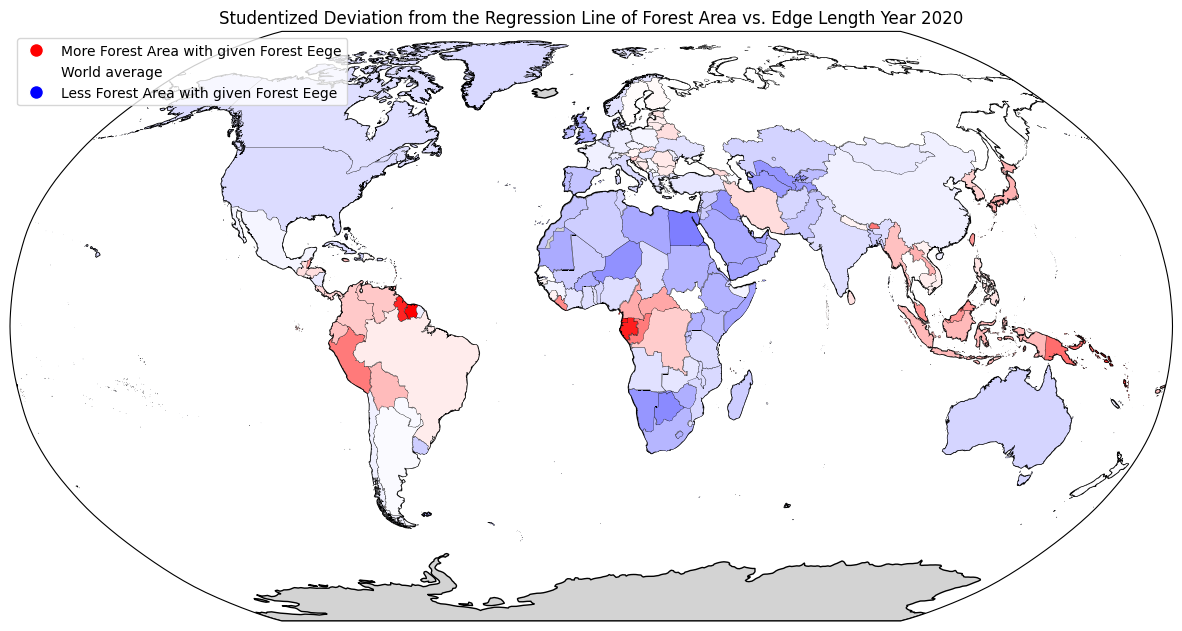

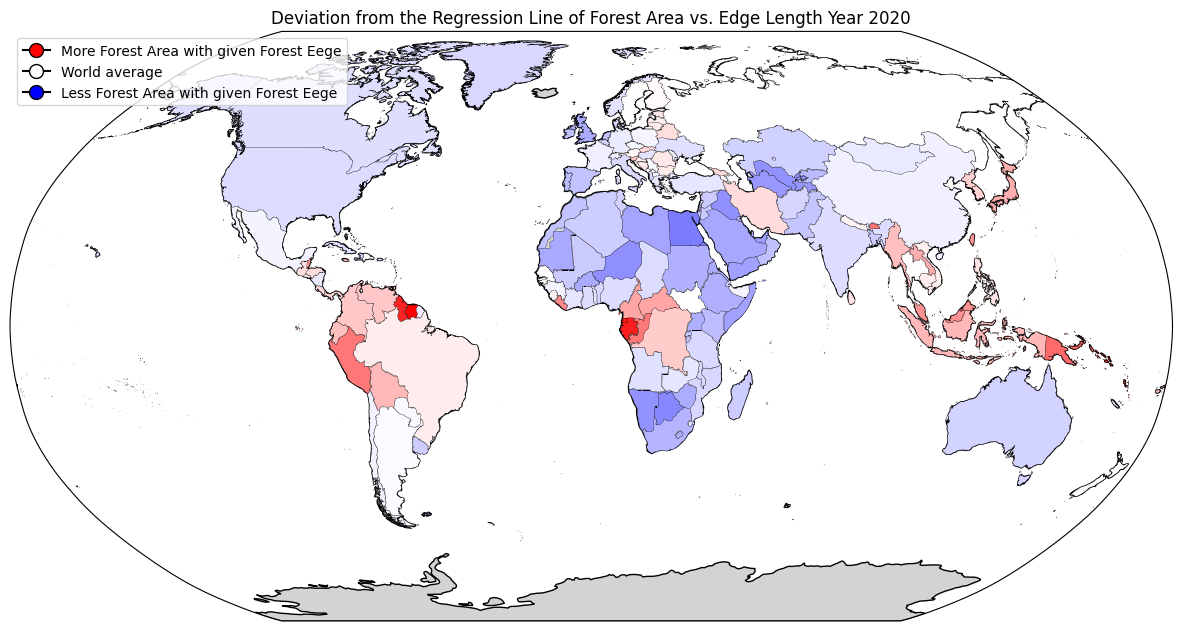

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
import numpy as np

# Function to get the deviation color
def get_color1(deviation):
    max_deviation = max(abs(data['studentized_residuals_manual']))
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'

# Function to get the deviation color
def get_color2(deviation):
    max_deviation = max(abs(data['residuals']))
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'
# Creating a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

# Reading the shapefile for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Plotting each country with the color representing the deviation
for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['SOVEREIGNT']
    if country_name in data['country'].values:
        deviation = data[data['country'] == country_name]['studentized_residuals_manual'].values[0]
        color = get_color1(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)

# Adding a title
plt.title('Studentized Deviation from the Regression Line of Forest Area vs. Edge Length Year 2020')

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='More Forest Area with given Forest Eege'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='World average'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Less Forest Area with given Forest Eege')
                  ]

ax.legend(handles=legend_elements, loc='upper left')

plt.show()


# Creating a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

# Reading the shapefile for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Plotting each country with the color representing the deviation
for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['SOVEREIGNT']
    if country_name in data['country'].values:
        deviation = data[data['country'] == country_name]['residuals'].values[0]
        color = get_color2(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)

# Adding a title
plt.title('Deviation from the Regression Line of Forest Area vs. Edge Length Year 2020')

legend_elements = [Line2D([0], [0], marker='o', color='black', markerfacecolor='red', markersize=10, label='More Forest Area with given Forest Eege'),
                   Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=10, label='World average'),
                   Line2D([0], [0], marker='o', color='black', markerfacecolor='blue', markersize=10, label='Less Forest Area with given Forest Eege')
                  ]

ax.legend(handles=legend_elements, loc='upper left')

plt.show()

In [20]:
import numpy as np
import statsmodels.api as sm

# Removing rows with zero or negative values in the columns used for regression
data = data[(data['Total Forest Area 2000'] > 0) & (data['forest edge 2000'] > 0)]

# Defining the dependent variable (Y) and independent variable (x)
Y = np.log(data['Total Forest Area 2000'])
X = np.log(data['forest edge 2000'])

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Creating the ordinary least squares (OLS) model
model = sm.OLS(Y, X).fit()

# Displaying the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Forest Area 2000   R-squared:                       0.931
Model:                                OLS   Adj. R-squared:                  0.931
Method:                     Least Squares   F-statistic:                     2535.
Date:                    Thu, 30 May 2024   Prob (F-statistic):          1.10e-110
Time:                            17:00:16   Log-Likelihood:                -257.52
No. Observations:                     189   AIC:                             519.0
Df Residuals:                         187   BIC:                             525.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9250      0.272    -14.429      0.000      -4.462      -3.388
forest edge 2000     1.1179      0.022     50.346      0.000       1.074       1.162
==============================================================================
Omnibus:                       39.888   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.595
Skew:                           1.151   Prob(JB):                     4.21e-14
Kurtosis:                       4.588   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Getting the predicted values
data['predicted_log_area'] = model.predict(X)

# Exponentiating the predicted values to get them on the original scale
data['predicted_area'] = np.exp(data['predicted_log_area'])

# Calculating the residuals (deviations from the regression line)
data['residuals'] = data['Total Forest Area 2020'] - data['predicted_area']

# Displaying the residuals
data[['country', 'Total Forest Area 2000', 'predicted_area', 'residuals']].head()

,country,Total Forest Area 2000,predicted_area,residuals
0,Indonesia,1.563676e+06,656164.291563,866832.641437
1,Malaysia,2.965485e+05,66397.332170,218927.291830
2,Chile,1.697228e+05,209291.179345,-39762.790045
3,Bolivia,5.967332e+05,237063.084008,326251.681392
4,Peru,7.881949e+05,129622.102081,650922.322919


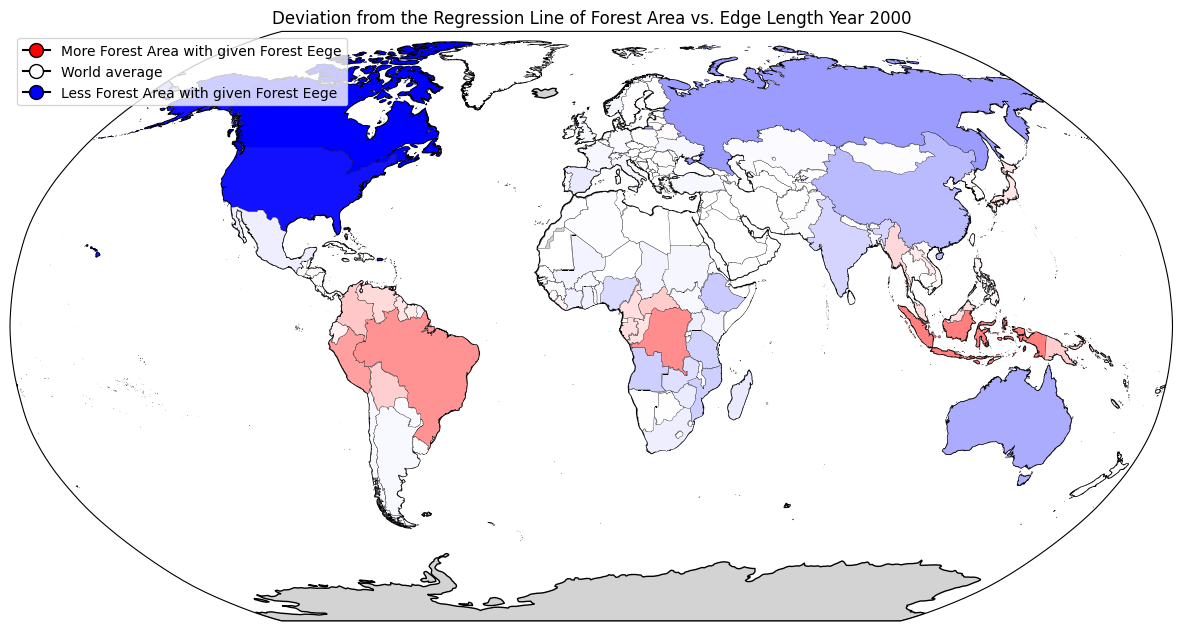

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
import numpy as np

# Function to get the deviation color
def get_color(deviation):
    max_deviation = max(abs(data['residuals']))
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'

# Creating a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

# Reading the shapefile for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Plotting each country with the color representing the deviation
for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['SOVEREIGNT']
    if country_name in data['country'].values:
        deviation = data[data['country'] == country_name]['residuals'].values[0]
        color = get_color(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)

# Adding a title
plt.title('Deviation from the Regression Line of Forest Area vs. Edge Length Year 2000')

legend_elements = [Line2D([0], [0], marker='o', color='black', markerfacecolor='red', markersize=10, label='More Forest Area with given Forest Eege'),
                   Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=10, label='World average'),
                   Line2D([0], [0], marker='o', color='black', markerfacecolor='blue', markersize=10, label='Less Forest Area with given Forest Eege')
                  ]

ax.legend(handles=legend_elements, loc='upper left')

plt.show()

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data
file_path = 'G:/Hangkai/Forest_edge_mapping_data/processed_country_data_with_area.csv'
data = pd.read_csv(file_path)

# Removing rows with zero or negative values in the columns used for regression
data = data[(data['Total Forest Area 2000'] > 0) & (data['forest edge 2000'] > 0)]

# Defining the dependent variable (Y) and independent variable (x)
Y = np.log(data['Total Forest Area 2000'])
X = np.log(data['forest edge 2000'])

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Creating the ordinary least squares (OLS) model and getting the predictions
model = sm.OLS(Y, X).fit()
data['predicted_log_area'] = model.predict(X)
data['predicted_area'] = np.exp(data['predicted_log_area'])

# Calculating the residuals
data['residuals'] = model.resid

# Calculating the hat matrix
hat_matrix = X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))

# Getting the diagonal of the hat matrix to obtain the leverage values
hat_matrix_diag = np.diag(hat_matrix)

# Estimating the standard deviation of the residuals (excluding the i-th observation)
sigma_i = np.sqrt((model.ssr - data['residuals']**2) / (len(X) - 2))

# Calculating the Studentized residuals manually
data['studentized_residuals_manual'] = data['residuals'] / (sigma_i * np.sqrt(1 - hat_matrix_diag))

# Displaying the Studentized residuals
print(data[['country', 'residuals', 'studentized_residuals_manual']].head())

# Sorting by residuals to find top 5 and bottom 5
top5_residuals = data.nlargest(10, 'residuals')[['country', 'residuals', 'studentized_residuals_manual']]
bottom5_residuals = data.nsmallest(10, 'residuals')[['country', 'residuals', 'studentized_residuals_manual']]

# Sorting by studentized residuals to find top 5 and bottom 5
top5_studentized = data.nlargest(5, 'studentized_residuals_manual')[['country', 'residuals', 'studentized_residuals_manual']]
bottom5_studentized = data.nsmallest(5, 'studentized_residuals_manual')[['country', 'residuals', 'studentized_residuals_manual']]

# Printing the top and bottom 5 for residuals
print("Top 5 residuals:")
print(top5_residuals)
print("\nBottom 5 residuals:")
print(bottom5_residuals)

# Printing the top and bottom 5 for studentized residuals
print("\nTop 5 studentized residuals:")
print(top5_studentized)
print("\n")
print("\nBottom 5 studentized residuals:")
print(bottom5_studentized)
print("\n")

     country  residuals  studentized_residuals_manual
0  Indonesia   0.868384                      0.921741
1   Malaysia   1.496554                      1.590859
2      Chile  -0.209560                     -0.221576
3    Bolivia   0.923144                      0.978581
4       Peru   1.805122                      1.925967
Top 5 residuals:
               country  residuals  studentized_residuals_manual
157  Equatorial Guinea   3.458945                      3.792181
21            Suriname   3.188517                      3.471005
184    Solomon Islands   2.882555                      3.122409
22              Guyana   2.740294                      2.958101
141              Gabon   2.732899                      2.949813
177           Dominica   2.538112                      2.748092
79             Liberia   2.447281                      2.629497
186            Vanuatu   2.335428                      2.508295
114             Brunei   2.063133                      2.208898
4                 P